# Inclass_LabExercise

## Case-Study 1 

### 1.a) Importing required libraries

In [39]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, scipy.stats as stats
%matplotlib inline
import pylab, os, pydotplus, warnings, statsmodels.api as sm
import statsmodels.formula.api as smf, statsmodels.stats.api as sms, statsmodels.tsa.api as smt
warnings.filterwarnings('ignore')
from scipy import stats
from math import sqrt
from sklearn import linear_model, metrics, preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import ttest_1samp
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, chi2 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
from mlxtend.feature_selection import sequential_feature_selector, SequentialFeatureSelector as sfs
from mlxtend.evaluate import confusion_matrix

### 1.b) Read the Dataset weather_nominal.csv

In [3]:
weather = pd.read_csv('weather.nominal.csv')
weather

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


###  1.c) Find out The root node using  the Gini Index Without using code ?


Gini gain(outlook) = Gini(s) - Gini(outlook)  = 0.116326531

Gini gain(Temp) = Gini(s) - Gini(temp)  = 0.018707483

Gini gain(windy) = Gini(s) - Gini(temp)  = 0.030612245

'outlook' has the highest gini gain, this attribute should be the root note

### 1.d) Calculate the outlook using Gini index?


In [5]:
pd.crosstab(weather.outlook, weather.play)

play,no,yes
outlook,,
overcast,0,4
rainy,2,3
sunny,3,2


Gini(Outlook=Sunny) = 1 – (2/5)2 – (3/5)2 = 1 – 0.16 – 0.36 = 0.48

Gini(Outlook=Overcast) = 1 – (4/4)2 – (0/4)2 = 0

Gini(Outlook=Rain) = 1 – (3/5)2 – (2/5)2 = 1 – 0.36 – 0.16 = 0.48

Then, we will calculate weighted sum of gini indexes for outlook feature.

Gini(Outlook) = (5/14) x 0.48 + (4/14) x 0 + (5/14) x 0.48 = 0.171 + 0 + 0.171 = 0.342

### 1.e) Calculate the Temperature using Gini index?


In [7]:
pd.crosstab(weather.temperature, weather.play)

play,no,yes
temperature,,
cool,1,3
hot,2,2
mild,2,4


Gini(Temp=Hot) = 1 – (2/4)2 – (2/4)2 = 0.5

Gini(Temp=Cool) = 1 – (3/4)2 – (1/4)2 = 1 – 0.5625 – 0.0625 = 0.375

Gini(Temp=Mild) = 1 – (4/6)2 – (2/6)2 = 1 – 0.444 – 0.111 = 0.445

We’ll calculate weighted sum of gini index for temperature feature

Gini(Temp) = (4/14) x 0.5 + (4/14) x 0.375 + (6/14) x 0.445 = 0.142 + 0.107 + 0.190 = 0.439

### 1.f) Calculate the Humidity using Gini index?


In [8]:
pd.crosstab(weather.humidity, weather.play)

play,no,yes
humidity,,
high,4,3
normal,1,6


Gini(Humidity=High) = 1 – (3/7)2 – (4/7)2 = 1 – 0.183 – 0.326 = 0.489

Gini(Humidity=Normal) = 1 – (6/7)2 – (1/7)2 = 1 – 0.734 – 0.02 = 0.244

Weighted sum for humidity feature will be calculated next

Gini(Humidity) = (7/14) x 0.489 + (7/14) x 0.244 = 0.367

### 1.g) Calculate the Wind using Gini index?


In [10]:
pd.crosstab(weather.windy, weather.play)

play,no,yes
windy,,
False,2,6
True,3,3


Gini(Wind=Weak) = 1 – (6/8)2 – (2/8)2 = 1 – 0.5625 – 0.062 = 0.375

Gini(Wind=Strong) = 1 – (3/6)2 – (3/6)2 = 1 – 0.25 – 0.25 = 0.5

Gini(Wind) = (8/14) x 0.375 + (6/14) x 0.5 = 0.428


# Case-study 2

### 2.a) Importing required libraries

### 2.b) Read dataset iris.csv

In [11]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 2.c) Drop the Id column?

In [12]:
df1 = df.drop('Id', axis=1)

###  2.d) EDA For Iris.csv Using Pairplot?

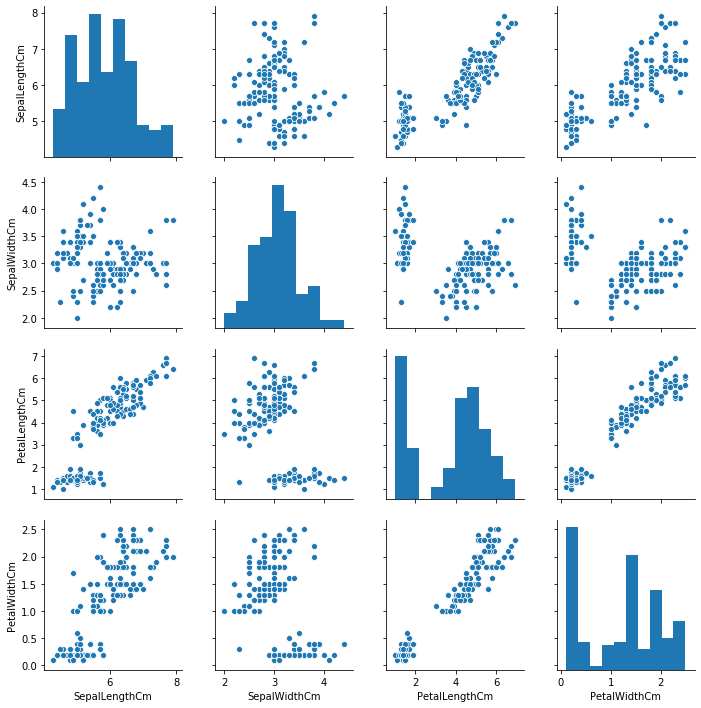

In [13]:
sns.pairplot(df1)

##### Observation about  Pairplot:

The Sepal Width and Length are not correlated. 

The Petal Width and Length are highly correlated.

### 2.e) Check The heatmap for correlation matrix and explain the outcomes

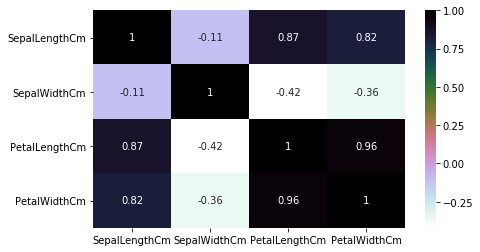

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df1.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

##### Observation about heatmap



The Sepal Width and Length are not correlated. 

The Petal Width and Length are highly correlated.

We will use all the features for training the algorithm and check the accuracy. Then we will use 2 features that are not correlated so that we can have a variance in the dataset which may help in improving the accuracy.

### 2.f) Extract the independent variable X and dependent variable Y?

In [17]:
le = preprocessing.LabelEncoder()
df1['Species'] = le.fit_transform(df1['Species'])
df1.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [18]:
y = df1.Species
X = df1.drop('Species', axis=1)

### 2.g) Split the data into train and test set:(70/30)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 2.h) Train a Decision Tree?

In [20]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 2.i) Plot the Decision Tree using the (Graphviz)

In [27]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

Note: Before Plotting the tree we need to Install the Graphviz:

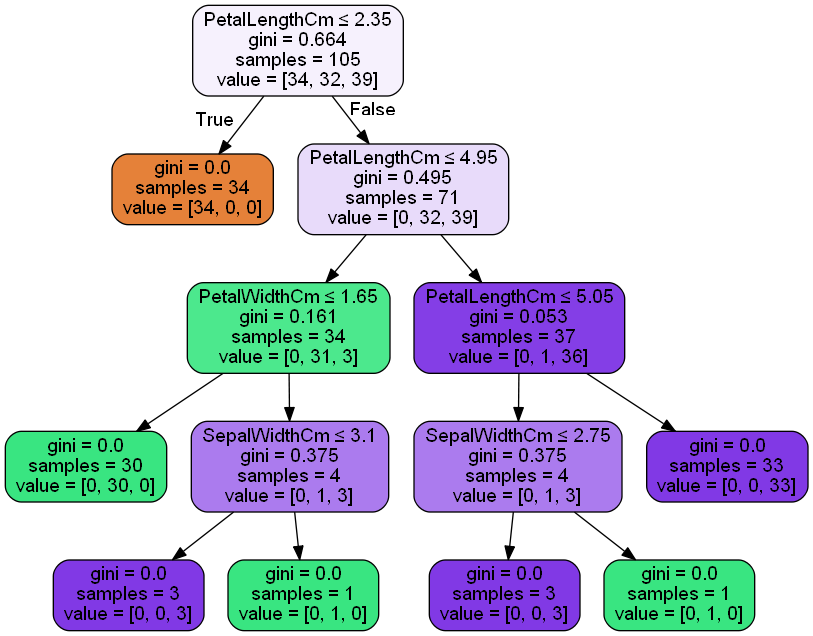

In [33]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
            filled = True, rounded = True,
            special_characters= True, feature_names=X.columns,
            class_names=None)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### 2.j) Predict the model:

In [21]:
y_pred = model.predict(X_test)

### 2.k) Find out the Accuracy and Misclassified?

In [34]:
print('The accuracy of the Decision Tree is', accuracy_score(y_test, y_pred))
print('Misclassified: 1')

The accuracy of the Decision Tree is 0.9777777777777777
Misclassified: 1


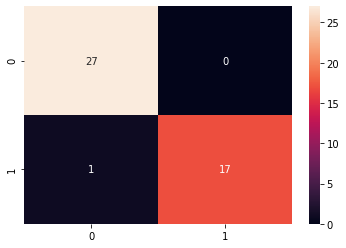

In [26]:
cm = confusion_matrix(y_test, y_pred,binary=True)
sns.heatmap(cm, annot=True)

###  2.l) What are the Outcomes of Binary Classification?

True positives: 17
    
False positives: 0
    
True negatives: 27
    
False negatives: 1

### 2.m) check the classification_report

In [23]:
print('classification_report:\n',classification_report(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 2.n) Explain about the Recall and Precision , F1 ?

Recall: By using recall we can reduce the type 2 error

Precision: By using Precision we can reduce the type 1 error

F1 score: It combine recall and precision

#  3. What are the Disadvantages and Advantages for Decision tree?

#### Disadvantages


A small change in the data can cause a large change in the structure of the decision tree causing instability. 

For a Decision tree sometimes calculation can go far more complex compared to other algorithms. 

Decision tree often involves higher time to train the model. 

Decision tree training is relatively expensive as complexity and time taken is more. 

Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

#### Advantages:


Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.

A decision tree does not require normalization of data. 

A decision tree does not require scaling of data as well. 

Missing values in the data also does NOT affect the process of building decision tree to any considerable extent. 

A Decision trees model is very intuitive and easy to explain to technical teams as well as stakeholders.